# Multivariable Linear Regression - Exploring Correlation
Continuing from the previous notebook (MultivariateRegression-ExploreData) this notebook will look at correlation, both between the features and the target and the correlation between features.

## Imports and Packages, Load Data Set, Create Data Frame

In [9]:
# Imports and packages required
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data set from sklearn
california_dataset = fetch_california_housing()

In [3]:
# Create a Pandas data frame:
data = pd.DataFrame(data=california_dataset.data, columns=california_dataset.feature_names)

# Add a column with the median house price (target)
data['MEDPRICE'] = california_dataset.target

## Correlation
## $$ \rho_{XY} = corr(X,Y) $$
## $$ -1.0 \leq \rho_{XY} \leq +1.0 $$

In [6]:
# Correlation between the average number of rooms and median income
data.MEDPRICE.corr(data.MedInc)

0.6880752079585477

In [8]:
# Show the correlation amongst all the different features and the target (median house price).
# Note the diagonal are all ones as this is the correlation of each feature with itself.
# Also, the data is reflected along the diagonal (top-right and bottom-left provide the same data).
data.corr() # Pearson correlation is the default (refer documentation).

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDPRICE
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MEDPRICE,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [14]:
# Create a mask to show only bottom-left of table
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask) # Get indices for th upper triangle (i.e., top right)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

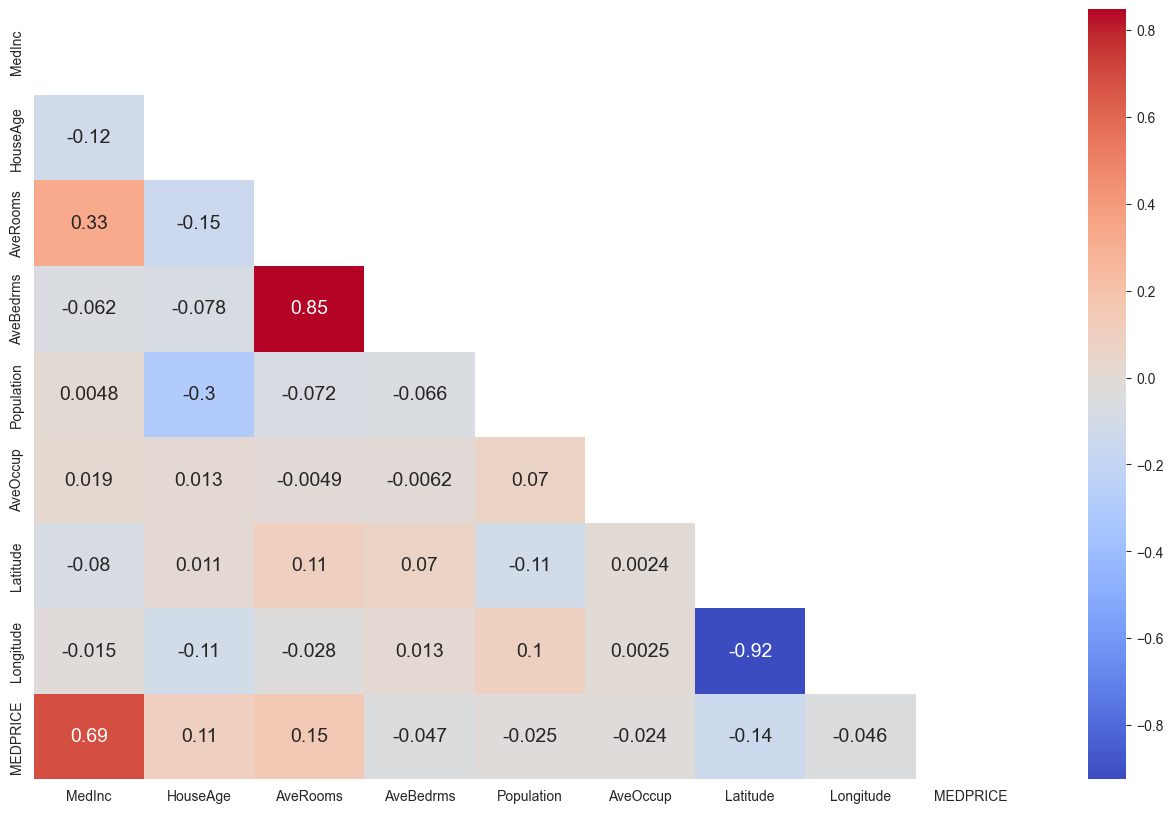

In [28]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size":14}, cmap='coolwarm')
plt.yticks(fontsize=10)
plt.show()

### Interpreting Correlation Results
There is a strong correlation (0.69) between median income and median house price. This is to be expected, and people with higher incomes can afford more expensive houses.

Correlation between different features includes:
* Strong correlation (0.85) between average number of bedrooms and average number of rooms per house.
* Strong negative correlation (-0.95) between latitude and longitude. This is interesting, and can be understood when looking at a map of California - which is a long thin state that is roughly on a negative sloped angle. This means as we travel from the bottom of the state towards the top, we also move from east to west.
* Most other features have very low correlation indicating they may not be useful for a multivariate regression model.

Where there is a high correlation between features (i.e., average number of bedrooms and average number of rooms, or latitude and longitude) it implies that perhaps only one of the highly correlated features should be used in the regression model and the other will not add any additional value. This allows us to reduce the complexity of the model, by removing features that are not adding value.

Note:
* Correlation can only be used for continuous data.
* Correlation **does not** imply causation.
* It is only useful for linear relationships.